In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

648

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | teguise
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | grindavik
Processing Record 7 of Set 1 | axim
Processing Record 8 of Set 1 | manggar
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | gorontalo
Processing Record 13 of Set 1 | masterton
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | hemsedal
Processing Record 16 of Set 1 | naze
Processing Record 17 of Set 1 | ndende
Processing Record 18 of Set 1 | egvekinot
Processing Record 19 of Set 1 | matagami
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 1 | moree
Processing Re

Processing Record 41 of Set 4 | ulety
Processing Record 42 of Set 4 | songkhla
Processing Record 43 of Set 4 | chara
Processing Record 44 of Set 4 | iquitos
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | porbandar
Processing Record 47 of Set 4 | qaanaaq
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | san vicente
Processing Record 50 of Set 4 | santa rosa
Processing Record 1 of Set 5 | hailar
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | amapa
Processing Record 4 of Set 5 | bongandanga
Processing Record 5 of Set 5 | hirara
Processing Record 6 of Set 5 | karratha
Processing Record 7 of Set 5 | solhan
Processing Record 8 of Set 5 | manzhouli
Processing Record 9 of Set 5 | evensk
Processing Record 10 of Set 5 | belaya gora
Processing Record 11 of Set 5 | batagay
Processing Record 12 of Set 5 | ust-uda
Processing Record 13 of Set 5 | sur
Processing Record 14 of Set 5 | kapoeta
Processing Record 15 of Set 5 | 

Processing Record 33 of Set 8 | dandong
Processing Record 34 of Set 8 | entre rios
Processing Record 35 of Set 8 | sioux lookout
Processing Record 36 of Set 8 | pafos
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | klaksvik
Processing Record 39 of Set 8 | hurghada
Processing Record 40 of Set 8 | garden city
Processing Record 41 of Set 8 | hervey bay
Processing Record 42 of Set 8 | freeport
Processing Record 43 of Set 8 | noyabrsk
Processing Record 44 of Set 8 | yanchukan
City not found. Skipping...
Processing Record 45 of Set 8 | bilibino
Processing Record 46 of Set 8 | kalemie
Processing Record 47 of Set 8 | okato
Processing Record 48 of Set 8 | epinal
Processing Record 49 of Set 8 | calvia
Processing Record 50 of Set 8 | huron
Processing Record 1 of Set 9 | harindanga
Processing Record 2 of Set 9 | iralaya
Processing Record 3 of Set 9 | bichena
Processing Record 4 of Set 9 | paamiut
Processing Record 5 of Set 9 | lichtenvoorde
Processing Record 6 of Set 9 | d

Processing Record 15 of Set 12 | kindu
Processing Record 16 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 17 of Set 12 | yaan
Processing Record 18 of Set 12 | kungur
Processing Record 19 of Set 12 | salalah
Processing Record 20 of Set 12 | bilma
Processing Record 21 of Set 12 | lensk
Processing Record 22 of Set 12 | voh
Processing Record 23 of Set 12 | north augusta
Processing Record 24 of Set 12 | tiznit
Processing Record 25 of Set 12 | vilyuysk
Processing Record 26 of Set 12 | trzebiatow
Processing Record 27 of Set 12 | pyryatyn
Processing Record 28 of Set 12 | tawkar
City not found. Skipping...
Processing Record 29 of Set 12 | thinadhoo
Processing Record 30 of Set 12 | dzilam gonzalez
Processing Record 31 of Set 12 | zyryanka
Processing Record 32 of Set 12 | pasni
Processing Record 33 of Set 12 | mackay
Processing Record 34 of Set 12 | marzuq
Processing Record 35 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 36 of Set 12 | almaznyy
Pr

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,45.18,75,90,6.91,US,2021-11-26 18:45:20
1,Teguise,29.0605,-13.5640,59.22,82,20,6.91,ES,2021-11-26 18:44:05
2,Mataura,-46.1927,168.8643,42.87,97,100,0.47,NZ,2021-11-26 18:41:32
3,Tuktoyaktuk,69.4541,-133.0374,-0.40,85,90,24.16,CA,2021-11-26 18:41:35
4,Grindavik,63.8424,-22.4338,28.87,64,0,3.44,IS,2021-11-26 18:49:16
5,Axim,4.8699,-2.2405,80.06,83,59,5.91,GH,2021-11-26 18:46:59
6,Manggar,-2.8833,108.2667,79.38,84,100,4.59,ID,2021-11-26 18:49:16
7,Fortuna,40.5982,-124.1573,55.74,62,1,0.00,US,2021-11-26 18:44:12
8,Hermanus,-34.4187,19.2345,65.71,86,100,8.46,ZA,2021-11-26 18:41:44
9,Gorontalo,0.5412,123.0595,75.07,95,98,3.87,ID,2021-11-26 18:49:17


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

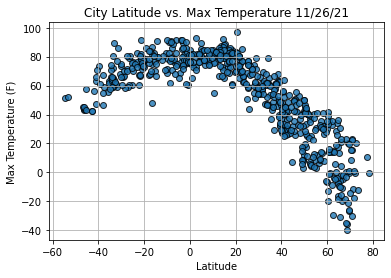

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

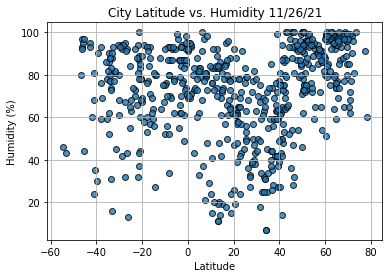

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

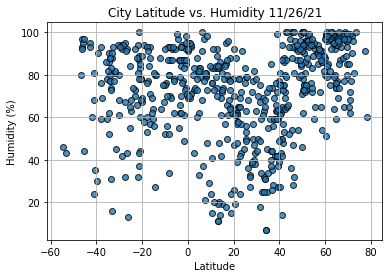

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

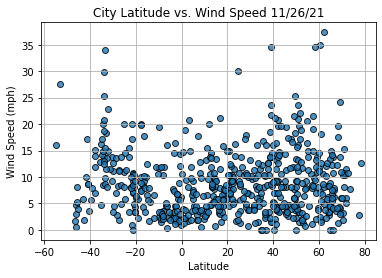

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

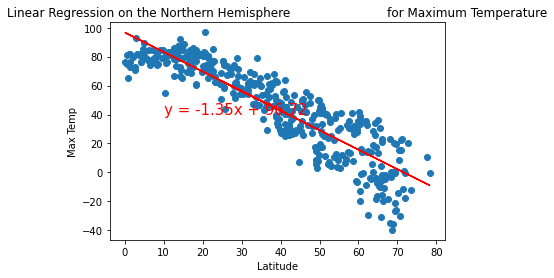

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

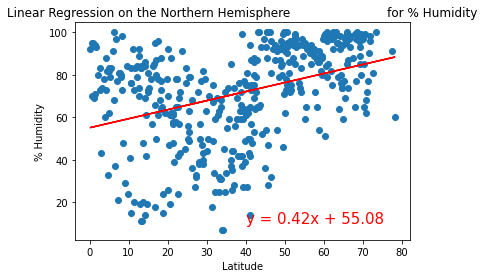

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))